In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3b6e6c98-84ed-4432-83f3-6a5e7751bf16',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had use "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to allow to pull data.

{'status': {'timestamp': '2023-04-09T08:30:49.051Z', 'error_code': 0, 'error_message': None, 'elapsed': 1983, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc = True)

In [5]:
## Viewing the data:

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10148,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934134e+07,1.934134e+07,False,NaN,1,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,27908.960282,9.833149e+09,-5.2071,0.004006,-0.740811,-1.767488,40.096228,20.253702,62.139383,5.397966e+11,46.0456,5.860882e+11,NaN,2023-04-09T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 08:31:07.818415+00:00
1,1027,Ethereum,ETH,ethereum,6710,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,1837.361263,5.472138e+09,-10.0038,0.025803,-1.974805,1.022745,30.406332,9.729965,40.294076,2.213245e+11,18.8733,2.213245e+11,NaN,2023-04-09T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 08:31:07.818415+00:00
2,825,Tether,USDT,tether,50926,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,1.000465,1.849419e+10,2.0707,0.025114,-0.008831,0.048166,0.047516,0.038886,0.044612,8.024780e+10,6.8431,8.313034e+10,NaN,2023-04-09T08:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 08:31:07.818415+00:00
3,1839,BNB,BNB,bnb,1247,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578867e+08,1.578867e+08,False,NaN,4,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,310.127221,4.616485e+08,0.5569,-0.056006,-0.725308,-1.655411,13.642211,-6.284780,11.778124,4.896496e+10,4.1760,4.896496e+10,NaN,2023-04-09T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 08:31:07.818415+00:00
4,3408,USD Coin,USDC,usd-coin,11578,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,0.999875,2.390100e+09,-7.9437,0.031099,-0.016213,0.039682,-0.001123,-0.007328,-0.021952,3.259640e+10,2.7796,3.259640e+10,NaN,2023-04-09T08:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 08:31:07.818415+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,0.503916,5.516483e+08,-35.1713,0.059139,-1.436727,-2.167919,36.635344,25.539742,44.198886,2.604664e+10,2.2214,5.039159e+10,NaN,2023-04-09T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 08:31:07.818415+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476096e+10,3.566069e+10,False,NaN,7,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,0.385986,1.861215e+08,-6.8558,0.081174,-0.958686,0.031350,25.518068,-3.200355,19.152101,1.341725e+10,1.1441,1.736938e+10,NaN,2023-04-09T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 08:31:07.818415+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388648e+11,1.388648e+11,False,NaN,8,NaN,NaN,NaN,2023-04-09T08:28:00.000Z,0.081707,4.399281e+08,-28.9601,-0.005273,-1.844916,-2.502097,24.830936,-10.994779,9.145125,1.134629e+10,0.9675,1.134629e+10,NaN,2023-04-09T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 08:31:07.818415+00:00
8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"[platform, enterprise-s

# Data Collection using CoinMarket Crypto API

In [6]:
## Creating a Function to automate pulling the data and storing it in a Csv file.

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3b6e6c98-84ed-4432-83f3-6a5e7751bf16', #Use Your own Key.
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc = True)
    
    # this is if you want to create a csv and append data to it
    if not os.path.isfile(r'E:\1. Tech\Python - Data Analysis\CoinMarketApi.csv'):
        df.to_csv(r'E:\1. Tech\Python - Data Analysis\CoinMarketApi.csv', header = 'column_names')
    else:
        df.to_csv(r'E:\1. Tech\Python - Data Analysis\CoinMarketApi.csv', mode = 'a', header = False)
        

    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    


In [7]:
## To run the api automatically after a certain period of time.

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner Completed. Function ran: ', i+1, ' times')
    sleep(30) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-04-09T08:31:25.981Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-09T08:31:57.059Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-09T08:32:27.838Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-09T08:32:58.234Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-09T08:33:29.023Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-09T08:33:59.397Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10148, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [8]:
df1_CoinMarket = pd.read_csv(r'E:\1. Tech\Python - Data Analysis\CoinMarketApi.csv')
df1_CoinMarket

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10144,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.933949e+07,1.933949e+07,False,NaN,1,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,27928.619457,1.296062e+10,-17.2958,0.091107,-0.104167,0.617701,26.787553,22.116470,64.911566,5.401253e+11,45.9032,5.865010e+11,NaN,2023-04-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:41:37.417038+00:00
1,1,1027,Ethereum,ETH,ethereum,6700,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,1856.804856,9.563615e+09,1.9588,-0.271632,-1.249314,3.746731,19.442926,13.728256,46.720191,2.236666e+11,19.0086,2.236666e+11,NaN,2023-04-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:41:37.417038+00:00
2,2,825,Tether,USDT,tether,50855,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.019539e+10,8.309174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,1.000398,2.281343e+10,-15.7808,-0.006546,0.028475,0.022573,0.040287,0.018731,0.059313,8.022727e+10,6.8182,8.312477e+10,NaN,2023-04-07T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 08:41:37.417038+00:00
3,3,1839,BNB,BNB,bnb,1243,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578871e+08,1.578871e+08,False,NaN,4,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,310.875535,5.059242e+08,-11.7771,-0.050774,-0.559703,-1.404924,8.429674,-4.654199,19.126353,4.908323e+10,4.1719,4.908323e+10,NaN,2023-04-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:41:37.417038+00:00
4,4,3408,USD Coin,USDC,usd-coin,11507,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.276284e+10,3.276284e+10,False,NaN,5,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,0.999788,3.640156e+09,-9.1941,0.001075,0.002429,0.001461,-0.025866,-0.014740,-0.015374,3.275589e+10,2.7841,3.275589e+10,NaN,2023-04-07T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 08:41:37.417038+00:00
5,5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,0.510806,1.087223e+09,-11.1631,0.957081,2.265531,-4.448590,35.067966,28.012219,49.198320,2.640279e+10,2.2441,5.108062e+10,NaN,2023-04-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:41:37.417038+00:00
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.475446e+10,3.566069e+10,False,NaN,7,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,0.379265,2.519535e+08,-10.2186,0.208722,-1.374307,-0.934515,17.208912,-3.710488,37.768253,1.318116e+10,1.1202,1.706694e+10,NaN,2023-04-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:41:37.417038+00:00
7,7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.388377e+11,1.388377e+11,False,NaN,8,NaN,NaN,NaN,2023-04-07T08:40:00.000Z,0.082993,1.464438e+09,12.3918,0.380969,-9.387249,11.906024,13.714478,-10.350589,14.575918,1.152253e+10,0.9794,1.152253e+10,NaN,2023-04-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 08:41:37.417038+00:00
8,8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:0

# Data Cleaning and Manipulaiton

In [9]:
# Change the Scientific notations of values to see the actual numbers

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
## Removing Null Values
df1_CoinMarket = df1_CoinMarket.fillna(0)

In [11]:
## Cleaning the date_added column, so that it looks better

df1_CoinMarket['date_added'] = pd.to_datetime(df1_CoinMarket['date_added'])
df1_CoinMarket['date_added'] = df1_CoinMarket['date_added'].dt.date

In [12]:
## Viewing all the changes:

df1_CoinMarket

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10144,2010-07-13,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19339493.00000,19339493.00000,False,0.00000,1,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,27928.61946,12960617961.77709,-17.29580,0.09111,-0.10417,0.61770,26.78755,22.11647,64.91157,540125340483.45502,45.90320,586501008591.71997,0.00000,2023-04-07T08:40:00.000Z,0.00000,0,0,0,0,2023-04-07 08:41:37.417038+00:00
1,1,1027,Ethereum,ETH,ethereum,6700,2015-08-07,"['pos', 'smart-contracts', 'ethereum-ecosystem...",0.00000,120457776.00000,120457776.00000,False,0.00000,2,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,1856.80486,9563614922.64371,1.95880,-0.27163,-1.24931,3.74673,19.44293,13.72826,46.72019,223666583414.06931,19.00860,223666583414.07001,0.00000,2023-04-07T08:40:00.000Z,0.00000,0,0,0,0,2023-04-07 08:41:37.417038+00:00
2,2,825,Tether,USDT,tether,50855,2015-02-25,"['payments', 'stablecoin', 'asset-backed-stabl...",0.00000,80195385809.39134,83091735571.87251,False,0.00000,3,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,1.00040,22813428846.85401,-15.78080,-0.00655,0.02848,0.02257,0.04029,0.01873,0.05931,80227269330.68851,6.81820,83124770603.67999,0.00000,2023-04-07T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 08:41:37.417038+00:00
3,3,1839,BNB,BNB,bnb,1243,2017-07-25,"['marketplace', 'centralized-exchange', 'payme...",0.00000,157887073.91450,157887073.91450,False,0.00000,4,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,310.87554,505924224.88603,-11.77710,-0.05077,-0.55970,-1.40492,8.42967,-4.65420,19.12635,49083228651.29917,4.17190,49083228651.30000,0.00000,2023-04-07T08:40:00.000Z,0.00000,0,0,0,0,2023-04-07 08:41:37.417038+00:00
4,4,3408,USD Coin,USDC,usd-coin,11507,2018-10-08,"['medium-of-exchange', 'stablecoin', 'asset-ba...",0.00000,32762839295.31017,32762839295.31017,False,0.00000,5,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,0.99979,3640155741.18451,-9.19410,0.00107,0.00243,0.00146,-0.02587,-0.01474,-0.01537,32755887121.02419,2.78410,32755887121.02000,0.00000,2023-04-07T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 08:41:37.417038+00:00
5,5,52,XRP,XRP,xrp,927,2013-08-04,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51688470797.00000,99989014677.00000,False,0.00000,6,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,0.51081,1087223141.12258,-11.16310,0.95708,2.26553,-4.44859,35.06797,28.01222,49.19832,26402793302.94790,2.24410,51080623775.16000,0.00000,2023-04-07T08:40:00.000Z,0.00000,0,0,0,0,2023-04-07 08:41:37.417038+00:00
6,6,2010,Cardano,ADA,cardano,764,2017-10-01,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34754459235.89300,35660688966.54200,False,0.00000,7,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,0.37927,251953534.17590,-10.21860,0.20872,-1.37431,-0.93452,17.20891,-3.71049,37.76825,13181162776.74292,1.12020,17066941566.48000,0.00000,2023-04-07T08:40:00.000Z,0.00000,0,0,0,0,2023-04-07 08:41:37.417038+00:00
7,7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",0.00000,138837726383.70526,138837726383.70526,False,0.00000,8,0.00000,0.00000,0.00000,2023-04-07T08:40:00.000Z,0.08299,1464437684.90167,12.39180,0.38097,-9.38725,11.9060

In [13]:
# Now let's look at the coin trends over time

df2_percentChange = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d' ]].mean()
df2_percentChange

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06646,-0.75946,-1.77332,40.01297,20.32459,62.14592
Ethereum,-0.12058,-2.04280,0.95183,30.26185,9.71524,40.23056
Tether,0.00210,-0.00275,0.06755,0.05896,0.04905,0.05729
BNB,-0.10061,-0.77680,-1.70760,13.60287,-6.27145,11.78275
USD Coin,-0.00048,-0.01807,0.04339,-0.00391,0.00440,-0.02289
XRP,0.03344,-1.41247,-2.38105,36.64530,25.58325,44.19579
Cardano,-0.10573,-1.05588,-0.04571,25.53837,-3.20684,18.96721
Dogecoin,-0.04950,-1.83629,-2.60441,24.78038,-10.94531,9.17707
Polygon,-0.30080,-2.07072,-1.95048,9.80365,-14.23951,27.89728


In [17]:
## Stacking in order to change the Columns to rows.

df3= df2_percentChange.stack()

df3

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.06646
                 quote.USD.percent_change_24h    -0.75946
                 quote.USD.percent_change_7d     -1.77332
                 quote.USD.percent_change_30d    40.01297
                 quote.USD.percent_change_60d    20.32459
                 quote.USD.percent_change_90d    62.14592
Ethereum         quote.USD.percent_change_1h     -0.12058
                 quote.USD.percent_change_24h    -2.04280
                 quote.USD.percent_change_7d      0.95183
                 quote.USD.percent_change_30d    30.26185
                 quote.USD.percent_change_60d     9.71524
                 quote.USD.percent_change_90d    40.23056
Tether           quote.USD.percent_change_1h      0.00210
                 quote.USD.percent_change_24h    -0.00275
                 quote.USD.percent_change_7d      0.06755
                 quote.USD.percent_change_30d     0.05896
                 quote.USD

In [18]:
type(df3)

pandas.core.series.Series

In [19]:
## Transforming data
df4= df3.to_frame(name = 'values')
df4

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.06646
                quote.USD.percent_change_24h  -0.75946
                quote.USD.percent_change_7d   -1.77332
                quote.USD.percent_change_30d  40.01297
                quote.USD.percent_change_60d  20.32459
                quote.USD.percent_change_90d  62.14592
Ethereum        quote.USD.percent_change_1h   -0.12058
                quote.USD.percent_change_24h  -2.04280
                quote.USD.percent_change_7d    0.95183
                quote.USD.percent_change_30d  30.26185
                quote.USD.percent_change_60d   9.71524
                quote.USD.percent_change_90d  40.23056
Tether          quote.USD.percent_change_1h    0.00210
                quote.USD.percent_change_24h  -0.00275
                quote.USD.percent_change_7d    0.06755
                quote.USD.percent_change_30d   0.05896
                quote.USD.percent_change_60d   0.04905
                quote.USD.percent_change_90d   0.05729
BNB             quote.USD.percent_change_1h   -0.10061
                quote.USD.percent_change_24h  -0.77680
                quote.USD.percent_change_7d   -1.70760
                quote.USD.percent_change_30d  13.60287
                quote.USD.percent_change_60d  -6.27145
                quote.USD.percent_change_90d  11.78275
USD Coin        quote.USD.percent_change_1h   -0.00048
                quote.USD.percent_change_24h  -0.01807
                quote.USD.percent_change_7d    0.04339
                quote.USD.percent_change_30d  -0.00391
                quote.USD.percent_change_60d   0.00440
                quote.USD.percent_change_90d  -0.02289
XRP             quote.USD.percent_change_1h    0.03344
                quote.USD.percent_change_24h  -1.41247
                quote.USD.percent_change_7d   -2.38105
                quote.USD.percent_change_30d  36.64530
                quote.USD.percent_change_60d  25.58325
                quote.USD.percent_change_90d  44.19579
Cardano         quote.USD.percent_change_1h   -0.10573
                quote.USD.percent_change_24h  -1.05588
                quote.USD.percent_change_7d   -0.04571
                quote.USD.percent_change_30d  25.53837
                quote.USD.percent_change_60d  -3.20684
                quote.USD.percent_change_90d  18.96721
Dogecoin        quote.USD.percent_change_1h   -0.04950
                quote.USD.percent_change_24h  -1.83629
                quote.USD.percent_change_7d   -2.60441
                quote.USD.percent_change_30d  24.78038
                quote.USD.percent_change_60d -10.94531
                quote.USD.percent_change_90d   9.17707
Polygon         quote.USD.percent_change_1h   -0.30080
                quote.USD.percent_change_24h  -2.07072
                quote.USD.percent_change_7d   -1.95048
                quote.USD.percent_change_30d   9.80365
                quote.USD.percent_change_60d -14.23951
                quote.USD.percent_change_90d  27.89728
Solana          quote.USD.percent_change_1h   -0.03956
                quote.USD.percent_change_24h  -3.05623
                quote.USD.percent_change_7d   -5.54981
                quote.USD.percent_change_30d  18.13533
                quote.USD.percent_change_60d -15.32935
                quote.USD.percent_change_90d  23.16043
Polkadot        quote.USD.percent_change_1h   -0.07094
                quote.USD.percent_change_24h  -1.23973
                quote.USD.percent_change_7d   -4.36442
                quote.USD.percent_change_30d  14.67247
                quote.USD.percent_change_60d -10.92067
                quote.USD.percent_change_90d  24.95719
Binance USD     quote.USD.percent_change_1h    0.02508
                quote.USD.percent_change_24h   0.00939
                quote.USD.percent_change_7d    0.09238
                quote.USD.percent_change_30d  -0.04762
                quote.USD.percent_change_60d   0.00371
                quote.USD.percent

In [20]:
type(df4)

pandas.core.frame.DataFrame

In [21]:
df4.count()

values    120
dtype: int64

In [22]:
## Providing Index number:
#Because of how it's structured above we need to set an index.
#So I'm creating a range and pass that as the dataframe. We can make it dynamic as well.

index = pd.Index(range(120))

df5 = df4.reset_index()
df5

##df6 = df5.set_index(index), This can be used as well.

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06646
1,Bitcoin,quote.USD.percent_change_24h,-0.75946
2,Bitcoin,quote.USD.percent_change_7d,-1.77332
3,Bitcoin,quote.USD.percent_change_30d,40.01297
4,Bitcoin,quote.USD.percent_change_60d,20.32459
5,Bitcoin,quote.USD.percent_change_90d,62.14592
6,Ethereum,quote.USD.percent_change_1h,-0.12058
7,Ethereum,quote.USD.percent_change_24h,-2.04280
8,Ethereum,quote.USD.percent_change_7d,0.95183
9,Ethereum,quote.USD.percent_change_30d,30.26185


In [23]:
## Renaming the Level1 Column

df6 = df5.rename(columns = {'level_1' : 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06646
1,Bitcoin,quote.USD.percent_change_24h,-0.75946
2,Bitcoin,quote.USD.percent_change_7d,-1.77332
3,Bitcoin,quote.USD.percent_change_30d,40.01297
4,Bitcoin,quote.USD.percent_change_60d,20.32459
5,Bitcoin,quote.USD.percent_change_90d,62.14592
6,Ethereum,quote.USD.percent_change_1h,-0.12058
7,Ethereum,quote.USD.percent_change_24h,-2.04280
8,Ethereum,quote.USD.percent_change_7d,0.95183
9,Ethereum,quote.USD.percent_change_30d,30.26185


In [24]:
## Renaming the Column names to short names for better visualization

df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.06646
1,Bitcoin,24h,-0.75946
2,Bitcoin,7d,-1.77332
3,Bitcoin,30d,40.01297
4,Bitcoin,60d,20.32459
5,Bitcoin,90d,62.14592
6,Ethereum,1h,-0.12058
7,Ethereum,24h,-2.04280
8,Ethereum,7d,0.95183
9,Ethereum,30d,30.26185


# Data Visualization


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

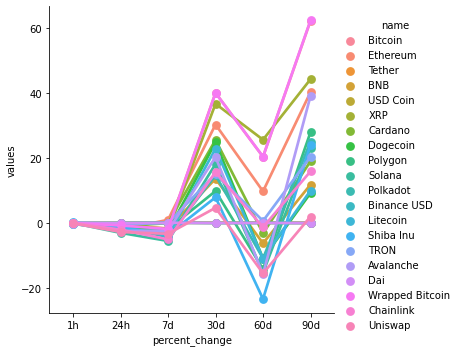

In [26]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df6, kind = 'point')

In [27]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df7_Bitcoin = df1_CoinMarket[['name','quote.USD.price','timestamp']]
df7_Bitcoin = df7_Bitcoin.query("name == 'Bitcoin'")
df7_Bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,27928.61946,2023-04-07 08:41:37.417038+00:00
20,Bitcoin,27928.61946,2023-04-07 08:42:08.535195+00:00
40,Bitcoin,27923.88263,2023-04-07 08:42:38.930456+00:00
60,Bitcoin,27939.55120,2023-04-07 15:27:56.179959+00:00
80,Bitcoin,27939.55120,2023-04-07 15:28:26.923249+00:00
100,Bitcoin,27932.78593,2023-04-07 15:28:57.680416+00:00
120,Bitcoin,27932.78593,2023-04-07 15:29:28.094834+00:00
140,Bitcoin,27931.44456,2023-04-07 15:29:58.897193+00:00
160,Bitcoin,27931.44456,2023-04-07 15:30:29.255038+00:00
180,Bitcoin,27928.50418,2023-04-07 15:30:59.628295+00:00


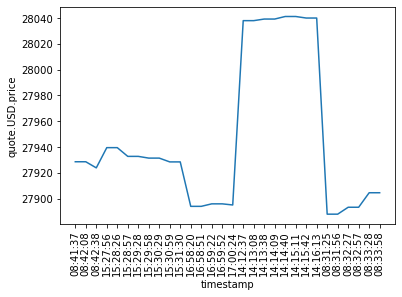

In [28]:
df7_Bitcoin['timestamp'] = pd.to_datetime(df7_Bitcoin['timestamp'])

sns.lineplot(x=df7_Bitcoin['timestamp'].dt.strftime('%H:%M:%S'), y='quote.USD.price', data=df7_Bitcoin)
plt.xticks(rotation=90)

# show the plot
plt.show()

In [29]:
#Creating a Dataframe With 2 cryptos: Ethereum and Doge

df8_ETH_doge = df1_CoinMarket.loc[df1_CoinMarket["name"].isin(["Ethereum", "Dogecoin"]), ["name", "quote.USD.price","quote.USD.percent_change_60d", "quote.USD.percent_change_90d", "quote.USD.market_cap_dominance","timestamp"]]
df8_ETH_doge = df8_ETH_doge.rename(columns = {'quote.USD.percent_change_90d': 'PercentChange_90days','quote.USD.market_cap_dominance':'MarketCap_Dominance','quote.USD.percent_change_60d': 'PercentChange_60days','quote.USD.percent_change_30d': 'PercentChange_30days','quote.USD.percent_change_7d': 'PercentChange_7days'})
df8_ETH_doge

,name,quote.USD.price,PercentChange_60days,PercentChange_90days,MarketCap_Dominance,timestamp
1,Ethereum,1856.80486,13.72826,46.72019,19.00860,2023-04-07 08:41:37.417038+00:00
7,Dogecoin,0.08299,-10.35059,14.57592,0.97940,2023-04-07 08:41:37.417038+00:00
21,Ethereum,1856.80486,13.72826,46.72019,19.00860,2023-04-07 08:42:08.535195+00:00
27,Dogecoin,0.08299,-10.35059,14.57592,0.97940,2023-04-07 08:42:08.535195+00:00
41,Ethereum,1856.54094,13.69917,46.68673,19.00590,2023-04-07 08:42:38.930456+00:00
47,Dogecoin,0.08297,-10.37935,14.54875,0.97910,2023-04-07 08:42:38.930456+00:00
61,Ethereum,1858.96612,14.36057,46.93466,19.00060,2023-04-07 15:27:56.179959+00:00
67,Dogecoin,0.08265,-9.49033,14.39476,0.97320,2023-04-07 15:27:56.179959+00:00
81,Ethereum,1858.96612,14.36057,46.93466,19.00060,2023-04-07 15:28:26.923249+00:00
87,Dogecoin,0.08265,-9.49033,14.39476,0.97320,2023-04-07 15:28:26.923249+00:00
